In [1]:

import tensorflow as tf
%reload_ext tensorboard
import tensorboard
import os 
import cv2
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from datetime import datetime
from packaging import version
!rm -rf ./logs/ 

In [2]:
img_height = 572
img_width = 572
channels = 3
inputs = tf.keras.Input(shape=(img_height,img_width,channels,))
inputs.shape

TensorShape([None, 572, 572, 3])

In [8]:

##### Downsampling:
c1 = layers.Conv2D(64,(3,3),activation = tf.nn.relu, name = 'c1')(inputs)
c2 = layers.Conv2D(64,(3,3), activation = tf.nn.relu, name = 'c2')(c1)
p1 = layers.MaxPool2D((2,2), name = 'p1')(c2)

c3 = layers.Conv2D(128,(3,3),activation = tf.nn.relu, name = 'c3')(p1)
c4 = layers.Conv2D(128,(3,3), activation = tf.nn.relu, name = 'c4')(c3)
p2 = layers.MaxPool2D((2,2), name = 'p2')(c4)

c5 = layers.Conv2D(256,(3,3),activation = tf.nn.relu, name = 'c5')(p2)
c6 = layers.Conv2D(256,(3,3), activation = tf.nn.relu, name = 'c6')(c5)
p3 = layers.MaxPool2D((2,2), name = 'p3')(c6)

c7 = layers.Conv2D(512,(3,3),activation = tf.nn.relu, name = 'c7')(p3)
c8 = layers.Conv2D(512,(3,3), activation = tf.nn.relu, name = 'c8')(c7)
p4 = layers.MaxPool2D((2,2), name = 'p4')(c8)
##### output@p4 = (batch_size, 32, 32, 512)

c9 = layers.Conv2D(1024,(3,3),activation = tf.nn.relu, name = 'c9')(p4)
c10 = layers.Conv2D(1024,(3,3),activation = tf.nn.relu, name = 'c10')(c9)


##### Upsampling:
u1 = layers.Conv2DTranspose(512,(2,2),activation = tf.nn.relu, strides = (2,2), name = 'u1')(c10)
c8 = layers.Cropping2D(cropping = ((4,4),(4,4)))(c8)
u1 = layers.concatenate([u1,c8])

c11 = layers.Conv2D(512,(3,3),activation = tf.nn.relu, name = 'c11')(u1)
c12 = layers.Conv2D(512,(3,3),activation = tf.nn.relu, name = 'c12')(c11)
u2 = layers.Conv2DTranspose(256,(2,2),activation = tf.nn.relu, strides = (2,2), name = 'u2')(c12)
c6 = layers.Cropping2D(cropping = ((16,16),(16,16)))(c6)
u2 = layers.concatenate([u2,c6])

c13 = layers.Conv2D(256,(3,3),activation = tf.nn.relu, name = 'c13')(u2)
c14 = layers.Conv2D(256,(3,3),activation = tf.nn.relu, name = 'c14')(c13)
u3 = layers.Conv2DTranspose(128,(2,2),activation = tf.nn.relu, strides = (2,2), name = 'u3')(c14)
c4 = layers.Cropping2D(cropping = ((40,40),(40,40)))(c4)
u3 = layers.concatenate([u3,c4])

c15 = layers.Conv2D(128,(3,3),activation = tf.nn.relu, name = 'c15')(u3)
c16 = layers.Conv2D(128,(3,3),activation = tf.nn.relu, name = 'c16')(c15)
u4 = layers.Conv2DTranspose(64,(2,2),activation = tf.nn.relu, strides = (2,2), name = 'u4')(c16)
c2 = layers.Cropping2D(cropping = ((88,88),(88,88)))(c2)
u4 = layers.concatenate([u4,c2])

c17 = layers.Conv2D(64,(3,3),activation = tf.nn.relu, name = 'c17')(u4)
c18 = layers.Conv2D(64,(3,3),activation = tf.nn.relu, name = 'c18')(c17)
c19 = layers.Conv2D(2,(3,3),activation = tf.nn.relu, name = 'c19')(c18)

print(c19)
print(u4)
model = keras.Model(inputs=inputs, outputs=c19)

Tensor("c19_1/Identity:0", shape=(None, 386, 386, 2), dtype=float32)
Tensor("concatenate_19/Identity:0", shape=(None, 392, 392, 128), dtype=float32)


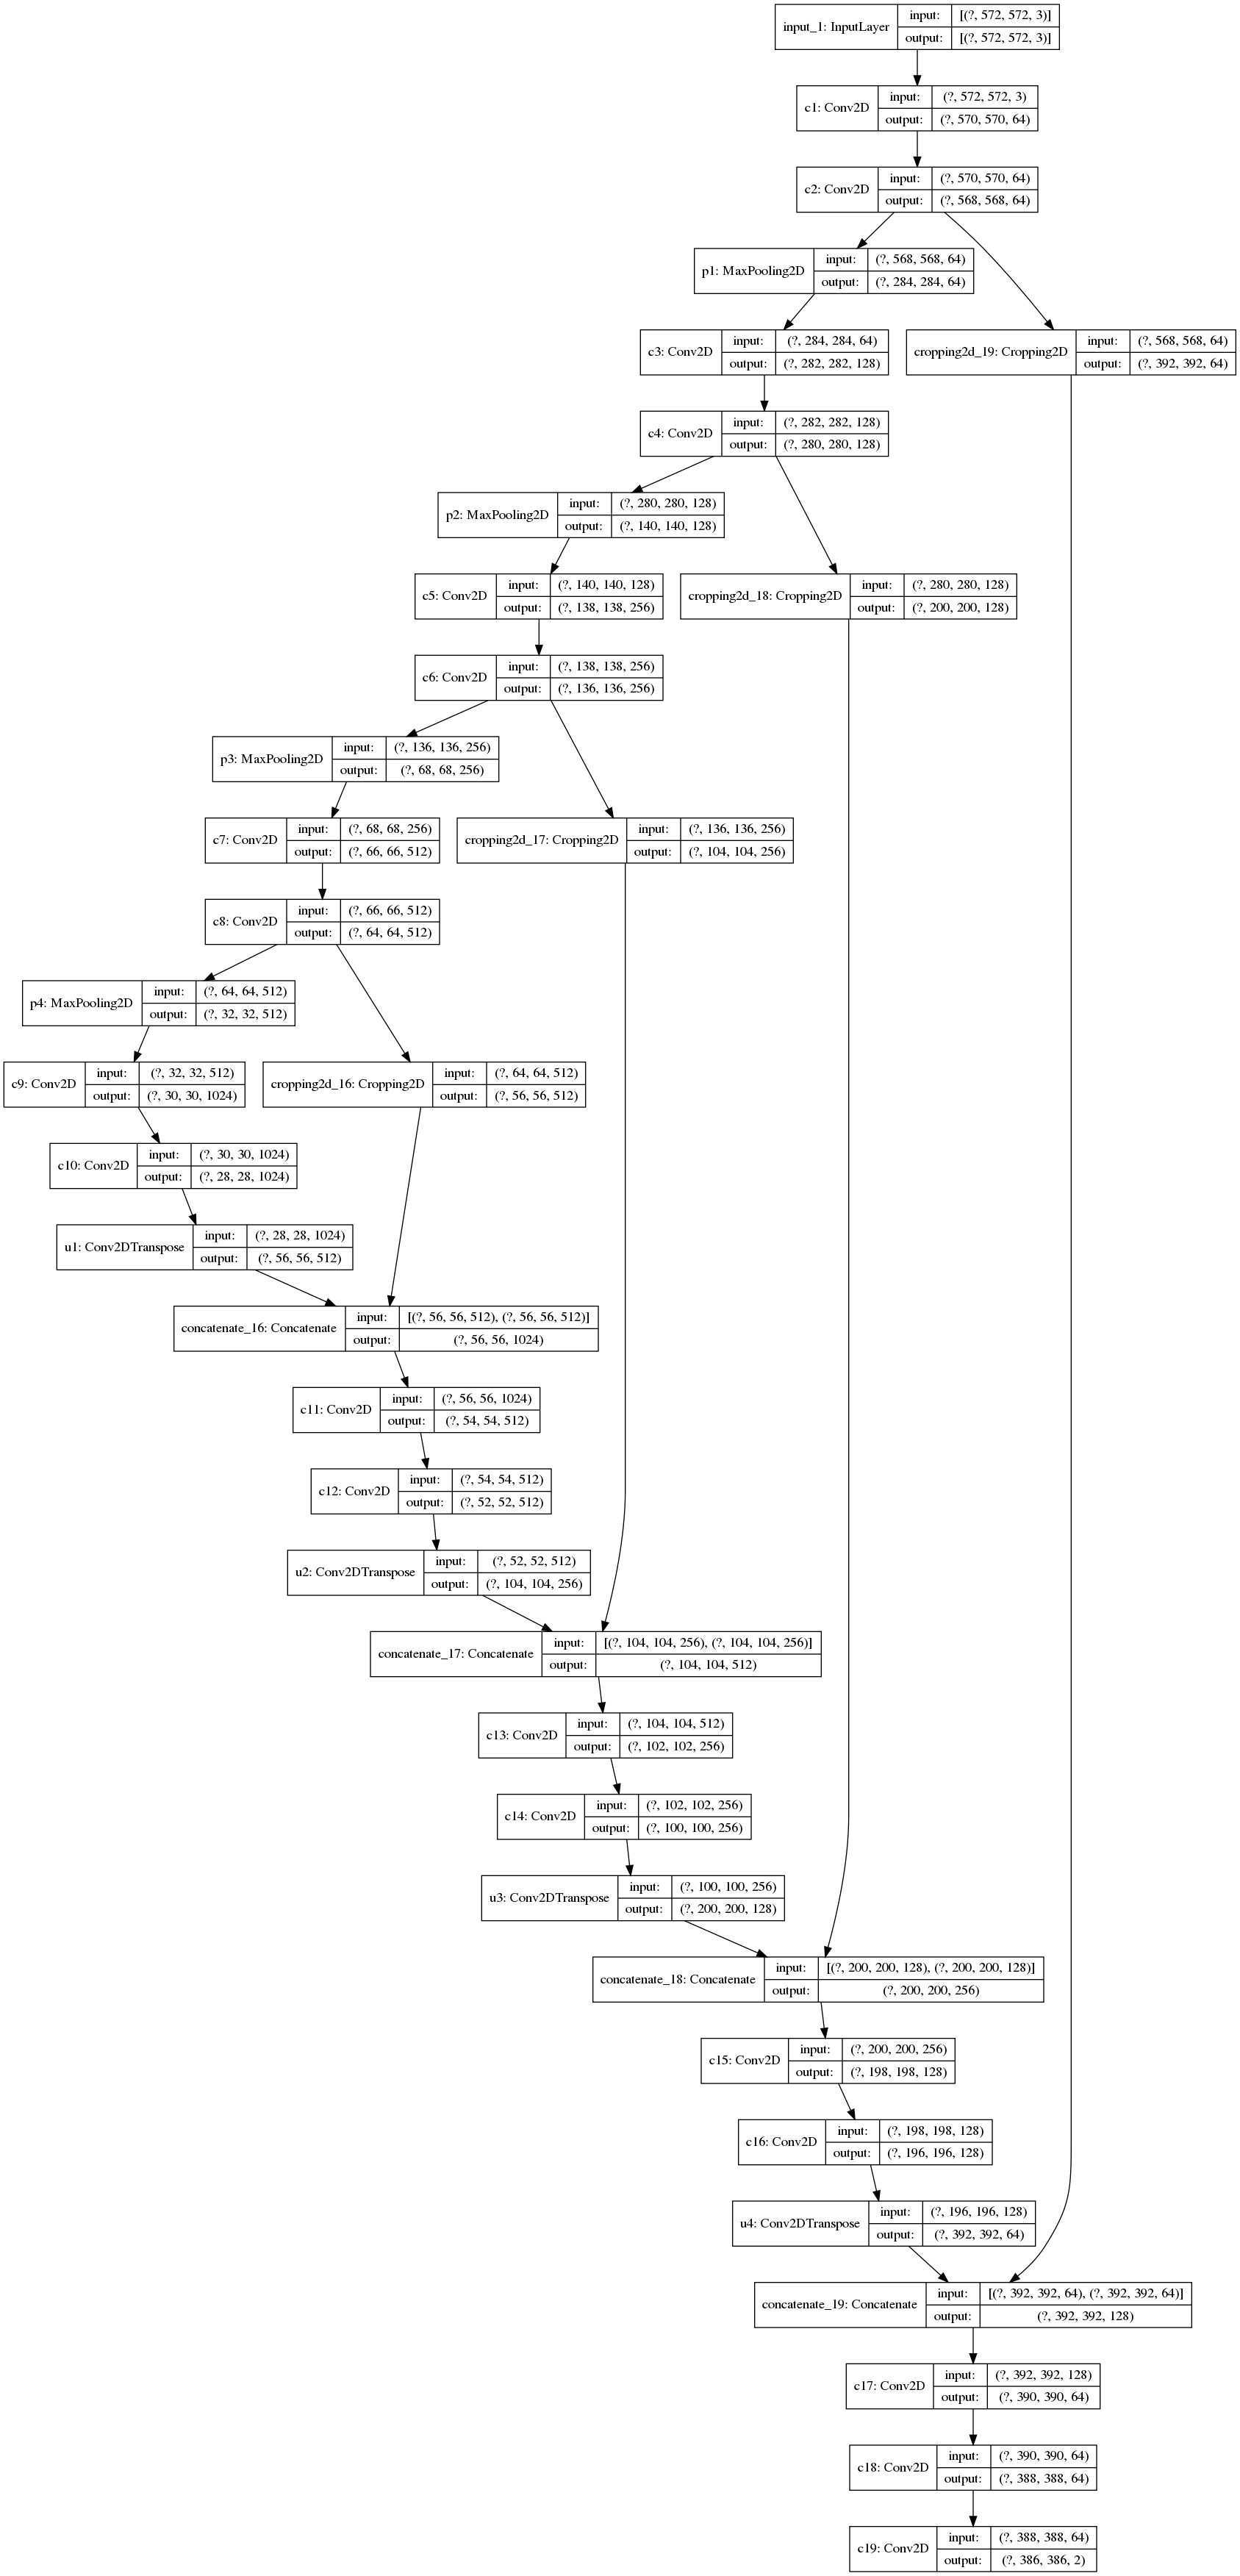

In [9]:
keras.utils.plot_model(model,show_shapes = True)
